In [3]:
!pip uninstall -y mlflow

Found existing installation: mlflow 2.20.3
Uninstalling mlflow-2.20.3:
  Successfully uninstalled mlflow-2.20.3


In [4]:
!pip install mlflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached mlflow-2.20.3-py3-none-any.whl.metadata (30 kB)
Using cached mlflow-2.20.3-py3-none-any.whl (28.4 MB)


-making the logging mandatory, checks for manadatory params logged or not if not promts to enter the vaues 

2025/03/17 12:10:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                              run_id experiment_id    status  \
0   b0c54dee0f3b4f72989765cf96c5c609             0   RUNNING   
1   94bb332df221444db859c4206bd3d4f2             0  FINISHED   
2   da5f397983bd4e319235c64d8d5a8b71             0    FAILED   
3   4a7f306652094002bfe416bfaefb73f5             0    FAILED   
4   57e347be878a4e128fb44dc486cec873             0    FAILED   
5   04105ed96fb446e0ad9a747f3c02c7e1             0    FAILED   
6   3d2c25574c8f4635b05c97c5d4e950b3             0    FAILED   
7   a7d72710d6b14b4d91f47ba5f21de179             0    FAILED   
8   0e97f901aa564a719d7f4801e2bbb801             0    FAILED   
9   de372aa024d741a092a526286694c048             0    FAILED   
10  a3a40028a4804005896c62a46d2f62c0             0    FAILED   
11  1078a3eb359c444583ffb8b63fd2652d             0    FAILED   
12  8e8324e929be445fb201dd037f606342             0    FAILED   
13  4385864770114988a8e78ad808619d2d             0  FINISHED   
14  4f04f34164b64da79d697ddb02856230    

2025/03/17 12:10:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLflow run completed successfully! Metadata saved in JSON.


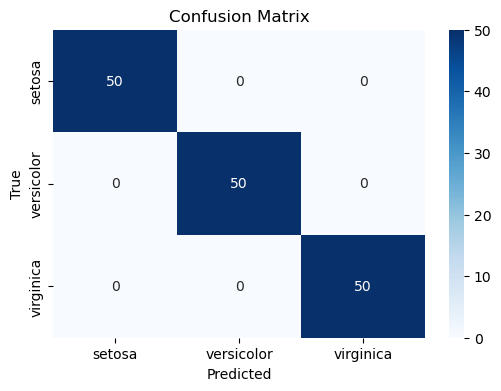

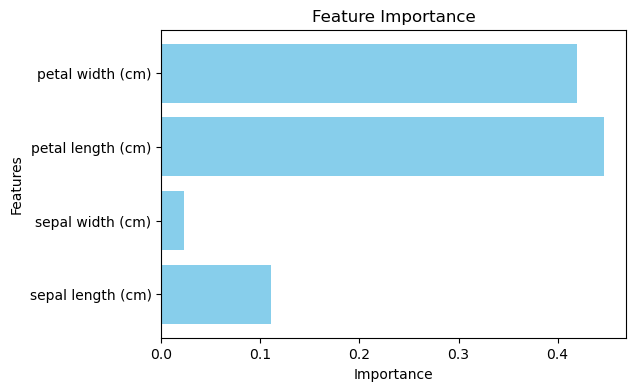

In [26]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
mlflow.end_run()
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Define required parameters
    required_params = ["params.dataset_used", "params.features", "params.target", "params.imputation_strategy", 
                   "params.scaling_method", "params.model_choice", "params.n_estimators", "params.max_depth"]


    # Define machine learning metadata structure
    experiment_metadata = {
        "experiment_id": "Unique ID for experiment (FAIR-ML, MLflow, PROV-O)",
        "model_name": "Name of the trained model (FAIR-ML, MLflow)",
        "algorithm": "Algorithm used (e.g., Random Forest, CNN, LSTM) (FAIR-ML)",
        "dataset_used": "Reference to dataset ID or DOI (FAIR-ML, PROV-O, DataCite)",
        "training_date": str(datetime.date.today()),
        "trained_by": "Person/organization responsible for training (PROV-O)",
        "data_preprocessing": {
            "missing_values": {
                "strategy": "imputation/removal/mean fill/etc.",
                "affected_columns": [],
                "imputation_method": "KNN, mean, regression, etc."
            },
            "feature_scaling": {
                "scaling_method": "MinMax, Standardization, etc.",
                "applied_columns": []
            },
            "encoding": {
                "categorical_encoding": "One-Hot Encoding, Label Encoding, etc.",
                "affected_columns": []
            },
            "outlier_handling": {
                "strategy": "winsorization, removal, log transformation",
                "affected_columns": [],
                "detection_method": "Z-score, IQR, DBSCAN"
            },
            "data_transformation": {
                "applied_methods": ["Log transformation", "Polynomial features", "PCA"],
                "reason_for_transformation": "Purpose (e.g., reducing dimensionality)"
            },
            "data_splits": {
                "train_test_split": "80-20, 70-30, etc.",
                "cross_validation_folds": "Number of folds (e.g., k=5)"
            }
        },
        "hyperparameters": {
            "learning_rate": 0.0,
            "batch_size": 0,
            "epochs": 0,
            "optimizer": "Adam",
            "loss_function": "Cross-entropy"
        },
        "performance_metrics": {
            "accuracy": 0.0,
            "f1_score": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "auc_roc": 0.0,
            "loss": 0.0
        },
        "model_explainability": {
            "explainability_report": "SHAP, LIME, Attention Weights",
            "feature_importance": [],
            "explainability_score": "Quantitative score"
        },
        "dependencies": [],
        "environment": "Software/hardware details (GPU, CPU, RAM, OS)",
        "model_artifact_location": "Storage path",
        "license": "MIT, Apache 2.0, etc.",
        "source_code": "GitHub/Bitbucket link",
        "training_logs": "Logs from training process",
        "previous_model": "Reference to prior model",
        "next_model": "Future versions if applicable",
        "derived_from": "Reference to dataset or prior models",
        "model_card": "Standardized documentation",
        "deployment_status": "Production, staging, inactive",
        "deployment_endpoint": "API endpoint for deployed model",
        "reproducibility_guidelines": "Steps for re-running experiment",
        "bias_analysis": {
            "bias_check_method": "Disparate impact, equalized odds",
            "identified_bias": "Summary of detected biases",
            "mitigation_strategies": "Reweighting, adversarial debiasing, etc."
        }
    }

    # Log dataset details
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", str(iris.feature_names))
    mlflow.log_param("target", str(list(iris.target_names)))

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    experiment_metadata["data_preprocessing"]["missing_values"] = {
        "strategy": "Imputation",
        "affected_columns": iris.feature_names,
        "imputation_method": "Mean"
    }
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    experiment_metadata["data_preprocessing"]["feature_scaling"] = {
        "scaling_method": "Standardization",
        "applied_columns": iris.feature_names
    }
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    experiment_metadata["performance_metrics"]["accuracy"] = accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    experiment_metadata["performance_metrics"]["confusion_matrix"] = cm.tolist()

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    experiment_metadata["performance_metrics"]["feature_importance"] = dict(zip(iris.feature_names, feature_importance))



    # Save metadata to a JSON file
    json_filename = "experiment_metadata.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)

    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

     # After logging the parameters, let's check if all required ones are present
    # Use search_runs() to inspect the parameters of the current or latest run
    runs = mlflow.search_runs(order_by=["start_time desc"])
    print(runs)
    logged_params = runs.iloc[0].to_dict()  # Get the params of the most recent run
    print(logged_params)
    logged_params = {key: logged_params[key] for key in logged_params if key not in ["_run_name", "start_time", "status"]}

    missing_params = [param for param in required_params if param not in logged_params]

    if missing_params:
        print(f"\nMandatory parameters missing: {missing_params}")
        for param in missing_params:
            value = input(f"Please provide a value for {param}: ")
            mlflow.log_param(param, value)  # Log the provided value in MLflow
    else: 
        print('all necessary params logged')
    # Save metadata to a JSON file
    json_filename = "experiment_metadata.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)

    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")


print("\nMLflow run completed successfully! Metadata saved in JSON.")
mlflow.end_run()

adding justification:

2025/03/17 12:34:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


params.dataset_used
Requesting justification for dataset_used...


Please provide justification for dataset_used:  kjnh


Logged Key-Value Pair: 'dataset_used_justification' = 'kjnh'
params.model_choice
Requesting justification for model_choice...


Please provide justification for model_choice:  jhg


Logged Key-Value Pair: 'model_choice_justification' = 'jhg'
params.imputation_strategy
Requesting justification for imputation_strategy...


Please provide justification for imputation_strategy:  mjh


Logged Key-Value Pair: 'imputation_strategy_justification' = 'mjh'
params.scaling_method
Requesting justification for scaling_method...


Please provide justification for scaling_method:  lmh


Logged Key-Value Pair: 'scaling_method_justification' = 'lmh'


2025/03/17 12:35:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLflow run completed successfully! Metadata saved in JSON.


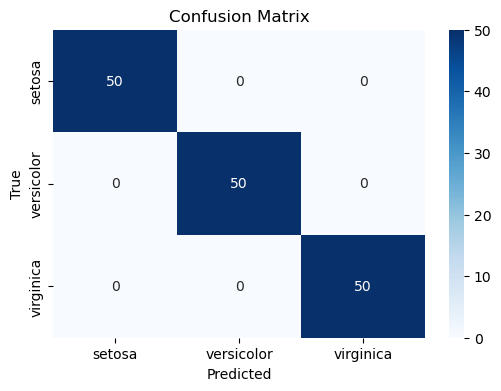

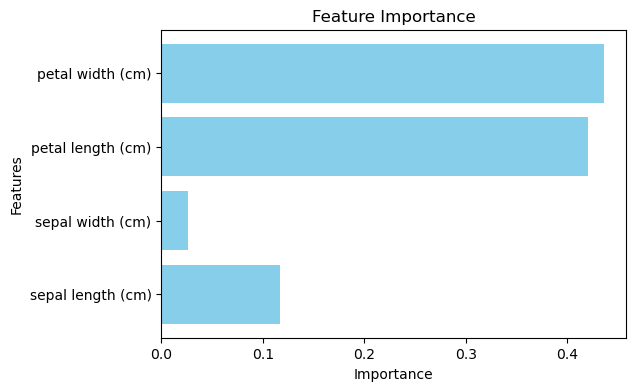

In [37]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
mlflow.end_run()
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Define required parameters
    required_params = ["params.dataset_used", "params.features", "params.target", "params.imputation_strategy", 
                   "params.scaling_method", "params.model_choice", "params.n_estimators", "params.max_depth"]

    # Define important parameters that require justification
    important_params = ["params.dataset_used", "params.model_choice", "params.imputation_strategy", "params.scaling_method"]

    # Define machine learning metadata structure
    experiment_metadata = {
        "experiment_id": "Unique ID for experiment (FAIR-ML, MLflow, PROV-O)",
        "model_name": "Name of the trained model (FAIR-ML, MLflow)",
        "algorithm": "Algorithm used (e.g., Random Forest, CNN, LSTM) (FAIR-ML)",
        "dataset_used": "Reference to dataset ID or DOI (FAIR-ML, PROV-O, DataCite)",
        "training_date": str(datetime.date.today()),
        "trained_by": "Person/organization responsible for training (PROV-O)",
        "data_preprocessing": {
            "missing_values": {
                "strategy": "imputation/removal/mean fill/etc.",
                "affected_columns": [],
                "imputation_method": "KNN, mean, regression, etc."
            },
            "feature_scaling": {
                "scaling_method": "MinMax, Standardization, etc.",
                "applied_columns": []
            },
            "encoding": {
                "categorical_encoding": "One-Hot Encoding, Label Encoding, etc.",
                "affected_columns": []
            },
            "outlier_handling": {
                "strategy": "winsorization, removal, log transformation",
                "affected_columns": [],
                "detection_method": "Z-score, IQR, DBSCAN"
            },
            "data_transformation": {
                "applied_methods": ["Log transformation", "Polynomial features", "PCA"],
                "reason_for_transformation": "Purpose (e.g., reducing dimensionality)"
            },
            "data_splits": {
                "train_test_split": "80-20, 70-30, etc.",
                "cross_validation_folds": "Number of folds (e.g., k=5)"
            }
        },
        "hyperparameters": {
            "learning_rate": 0.0,
            "batch_size": 0,
            "epochs": 0,
            "optimizer": "Adam",
            "loss_function": "Cross-entropy"
        },
        "performance_metrics": {
            "accuracy": 0.0,
            "f1_score": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "auc_roc": 0.0,
            "loss": 0.0
        },
        "model_explainability": {
            "explainability_report": "SHAP, LIME, Attention Weights",
            "feature_importance": [],
            "explainability_score": "Quantitative score"
        },
        "dependencies": [],
        "environment": "Software/hardware details (GPU, CPU, RAM, OS)",
        "model_artifact_location": "Storage path",
        "license": "MIT, Apache 2.0, etc.",
        "source_code": "GitHub/Bitbucket link",
        "training_logs": "Logs from training process",
        "previous_model": "Reference to prior model",
        "next_model": "Future versions if applicable",
        "derived_from": "Reference to dataset or prior models",
        "model_card": "Standardized documentation",
        "deployment_status": "Production, staging, inactive",
        "deployment_endpoint": "API endpoint for deployed model",
        "reproducibility_guidelines": "Steps for re-running experiment",
        "bias_analysis": {
            "bias_check_method": "Disparate impact, equalized odds",
            "identified_bias": "Summary of detected biases",
            "mitigation_strategies": "Reweighting, adversarial debiasing, etc."
        }
    }

    # Log dataset details
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", str(iris.feature_names))
    mlflow.log_param("target", str(list(iris.target_names)))

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    experiment_metadata["data_preprocessing"]["missing_values"] = {
        "strategy": "Imputation",
        "affected_columns": iris.feature_names,
        "imputation_method": "Mean"
    }
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    experiment_metadata["data_preprocessing"]["feature_scaling"] = {
        "scaling_method": "Standardization",
        "applied_columns": iris.feature_names
    }
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    experiment_metadata["performance_metrics"]["accuracy"] = accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    experiment_metadata["performance_metrics"]["confusion_matrix"] = cm.tolist()

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    experiment_metadata["performance_metrics"]["feature_importance"] = dict(zip(iris.feature_names, feature_importance))



    # Save metadata to a JSON file
    json_filename = "experiment_metadata.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)

    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

     # After logging the parameters, let's check if all required ones are present
    # Use search_runs() to inspect the parameters of the current or latest run
    runs = mlflow.search_runs(order_by=["start_time desc"])
    # print(runs)
    logged_params = runs.iloc[0].to_dict()  # Get the params of the most recent run
    # print(logged_params)
    logged_params = {key: logged_params[key] for key in logged_params if key not in ["_run_name", "start_time", "status"]}

    missing_params = [param for param in required_params if param not in logged_params]

    # if missing_params:
    #     print(f"\nMandatory parameters missing: {missing_params}")
    #     for param in missing_params:
    #         value = input(f"Please provide a value for {param}: ")
    #         mlflow.log_param(param, value)  # Log the provided value in MLflow

    #         # If the parameter is in the important_params list, request justification
    #         if param in important_params:
    #             justification = input(f"Please provide justification for {param.split('.')[-1]}: ")
    #             # Log the justification
    #             mlflow.log_param(f"{param.split('.')[-1]}_justification", justification)

    # else: 
    #     print('all necessary params logged')
    if missing_params:
        print(f"\nMandatory parameters missing: {missing_params}")
        for param in missing_params:
            print(param)
            value = input(f"Please provide a value for {param}: ")
            # Log the provided value in MLflow
            mlflow.log_param(param.split(".")[-1], value)  # Log without the "params." prefix
            
            # Debugging: Check if we are reaching the justification prompt
            print(f"Checking if {param.split('.')[-1]} is in important_params...")
    

    for param in important_params:
        print(param)
        print(f"Requesting justification for {param.split('.')[-1]}...")  # Debugging line
        justification = input(f"Please provide justification for {param.split('.')[-1]}: ")
        # Log the justification
        mlflow.log_param(f"{param.split('.')[-1]}_justification", justification)
        
   # Print the key-value pair (parameter and justification)
        print(f"Logged Key-Value Pair: '{param.split('.')[-1]}_justification' = '{justification}'")
         
    # Save metadata to a JSON file
    json_filename = "experiment_metadata_new.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)

    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")


print("\nMLflow run completed successfully! Metadata saved in JSON.")
mlflow.end_run()

2025/03/17 12:52:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Please provide justification for dataset_used:  ghfh
Please provide justification for model_choice:  hfghj
Please provide justification for imputation_strategy:  jghj
Please provide justification for scaling_method:  ghjghj


2025/03/17 12:53:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLflow run completed successfully! Metadata saved in JSON.


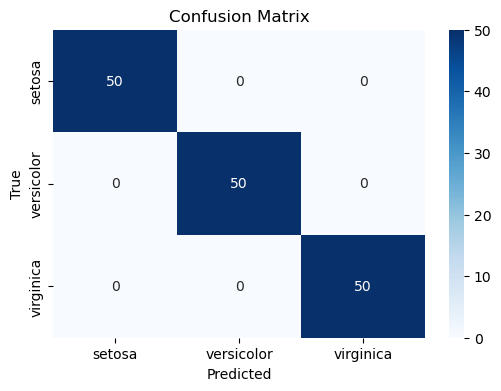

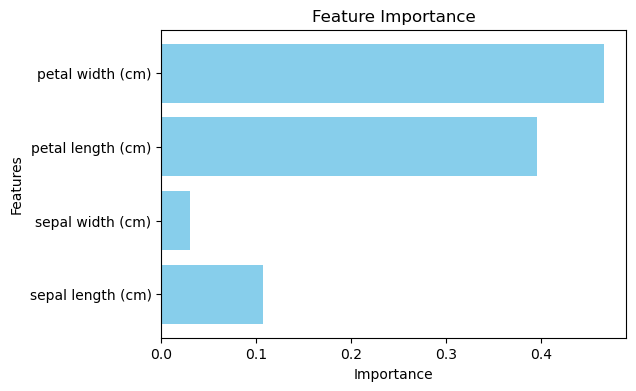

In [42]:
import mlflow
import mlflow.sklearn
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Start MLflow run
with mlflow.start_run():
    # Load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Define required parameters
    required_params = ["params.dataset_used", "params.features", "params.target", "params.imputation_strategy", 
                   "params.scaling_method", "params.model_choice", "params.n_estimators", "params.max_depth"]

    # Define important parameters that require justification
    important_params = ["params.dataset_used", "params.model_choice", "params.imputation_strategy", "params.scaling_method"]

    # Define machine learning metadata structure
    experiment_metadata = {
        "experiment_id": "Unique ID for experiment (FAIR-ML, MLflow, PROV-O)",
        "model_name": "Name of the trained model (FAIR-ML, MLflow)",
        "algorithm": "Algorithm used (e.g., Random Forest, CNN, LSTM) (FAIR-ML)",
        "dataset_used": "Reference to dataset ID or DOI (FAIR-ML, PROV-O, DataCite)",
        "training_date": str(datetime.date.today()),
        "trained_by": "Person/organization responsible for training (PROV-O)",
        "data_preprocessing": {
            "missing_values": {
                "strategy": "imputation/removal/mean fill/etc.",
                "affected_columns": [],
                "imputation_method": "KNN, mean, regression, etc."
            },
            "feature_scaling": {
                "scaling_method": "MinMax, Standardization, etc.",
                "applied_columns": []
            },
            "encoding": {
                "categorical_encoding": "One-Hot Encoding, Label Encoding, etc.",
                "affected_columns": []
            },
            "outlier_handling": {
                "strategy": "winsorization, removal, log transformation",
                "affected_columns": [],
                "detection_method": "Z-score, IQR, DBSCAN"
            },
            "data_transformation": {
                "applied_methods": ["Log transformation", "Polynomial features", "PCA"],
                "reason_for_transformation": "Purpose (e.g., reducing dimensionality)"
            },
            "data_splits": {
                "train_test_split": "80-20, 70-30, etc.",
                "cross_validation_folds": "Number of folds (e.g., k=5)"
            }
        },
        "hyperparameters": {
            "learning_rate": 0.0,
            "batch_size": 0,
            "epochs": 0,
            "optimizer": "Adam",
            "loss_function": "Cross-entropy"
        },
        "performance_metrics": {
            "accuracy": 0.0,
            "f1_score": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "auc_roc": 0.0,
            "loss": 0.0
        },
        "model_explainability": {
            "explainability_report": "SHAP, LIME, Attention Weights",
            "feature_importance": [],
            "explainability_score": "Quantitative score"
        },
        "dependencies": [],
        "environment": "Software/hardware details (GPU, CPU, RAM, OS)",
        "model_artifact_location": "Storage path",
        "license": "MIT, Apache 2.0, etc.",
        "source_code": "GitHub/Bitbucket link",
        "training_logs": "Logs from training process",
        "previous_model": "Reference to prior model",
        "next_model": "Future versions if applicable",
        "derived_from": "Reference to dataset or prior models",
        "model_card": "Standardized documentation",
        "deployment_status": "Production, staging, inactive",
        "deployment_endpoint": "API endpoint for deployed model",
        "reproducibility_guidelines": "Steps for re-running experiment",
        "bias_analysis": {
            "bias_check_method": "Disparate impact, equalized odds",
            "identified_bias": "Summary of detected biases",
            "mitigation_strategies": "Reweighting, adversarial debiasing, etc."
        },
         "justifications": {}
    }

    # Log dataset details
    mlflow.log_param("dataset_used", "Iris")
    mlflow.log_param("features", str(iris.feature_names))
    mlflow.log_param("target", str(list(iris.target_names)))

    # Step 1: Data Preprocessing - Handle Missing Values
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    experiment_metadata["data_preprocessing"]["missing_values"] = {
        "strategy": "Imputation",
        "affected_columns": iris.feature_names,
        "imputation_method": "Mean"
    }
    mlflow.log_param("imputation_strategy", "mean")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    experiment_metadata["data_preprocessing"]["feature_scaling"] = {
        "scaling_method": "Standardization",
        "applied_columns": iris.feature_names
    }
    mlflow.log_param("scaling_method", "StandardScaler")

    # Step 3: Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)
    mlflow.log_param("model_choice", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    experiment_metadata["performance_metrics"]["accuracy"] = accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    experiment_metadata["performance_metrics"]["confusion_matrix"] = cm.tolist()

    # Feature Importance Plot
    feature_importance = model.feature_importances_
    plt.figure(figsize=(6, 4))
    plt.barh(iris.feature_names, feature_importance, color="skyblue")
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    experiment_metadata["performance_metrics"]["feature_importance"] = dict(zip(iris.feature_names, feature_importance))

    
    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Check if all required parameters are logged
    runs = mlflow.search_runs(order_by=["start_time desc"])
    logged_params = runs.iloc[0].to_dict()  # Get the params of the most recent run
    logged_params = {key: logged_params[key] for key in logged_params if key not in ["_run_name", "start_time", "status"]}

    missing_params = [param for param in required_params if param not in logged_params]

    if missing_params:
        print(f"\nMandatory parameters missing: {missing_params}")
        for param in missing_params:
            value = input(f"Please provide a value for {param}: ")
            mlflow.log_param(param.split(".")[-1], value)  # Log without "params." prefix
            
        # # Log justifications for important parameters
        # for param in important_params:
        #     justification = input(f"Please provide justification for {param.split('.')[-1]}: ")
        #     mlflow.log_param(f"{param.split('.')[-1]}_justification", justification)
    for param in important_params:
        justification = input(f"Please provide justification for {param.split('.')[-1]}: ")
        # Add justification inside the "justifications" object in the metadata
        # Store the justification inside the 'justifications' dictionary
        experiment_metadata["justifications"][param] = justification

        
  
    # Log the model again
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Save metadata to a JSON file
    json_filename = "ml_metadata_with_justifications.json"
    with open(json_filename, "w") as json_file:
        json.dump(experiment_metadata, json_file, indent=4)

    # Log JSON as an MLflow artifact
    mlflow.log_artifact(json_filename)


print("\nMLflow run completed successfully! Metadata saved in JSON.")
mlflow.end_run()
